<a href="https://colab.research.google.com/github/sunidhipathak639/emoji-rating/blob/main/sunidhi_pathak_worl_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the Kaggle library
!pip install kaggle

# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Create a Kaggle directory in Colab
! mkdir ~/.kaggle


# Copy the uploaded kaggle.json from Google Drive to the Kaggle directory in Colab
!cp "/content/drive/MyDrive/project/kaggle.json" ~/.kaggle/kaggle.json

# Set the appropriate permissions for your Colab to communicate with Kaggle
!chmod 600 ~/.kaggle/kaggle.json



Mounted at /content/drive


In [2]:
! kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 54.7MB/s]


In [3]:
! unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                



Data for the year 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), 

<ipython-input-8-344669f8de63>:57: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


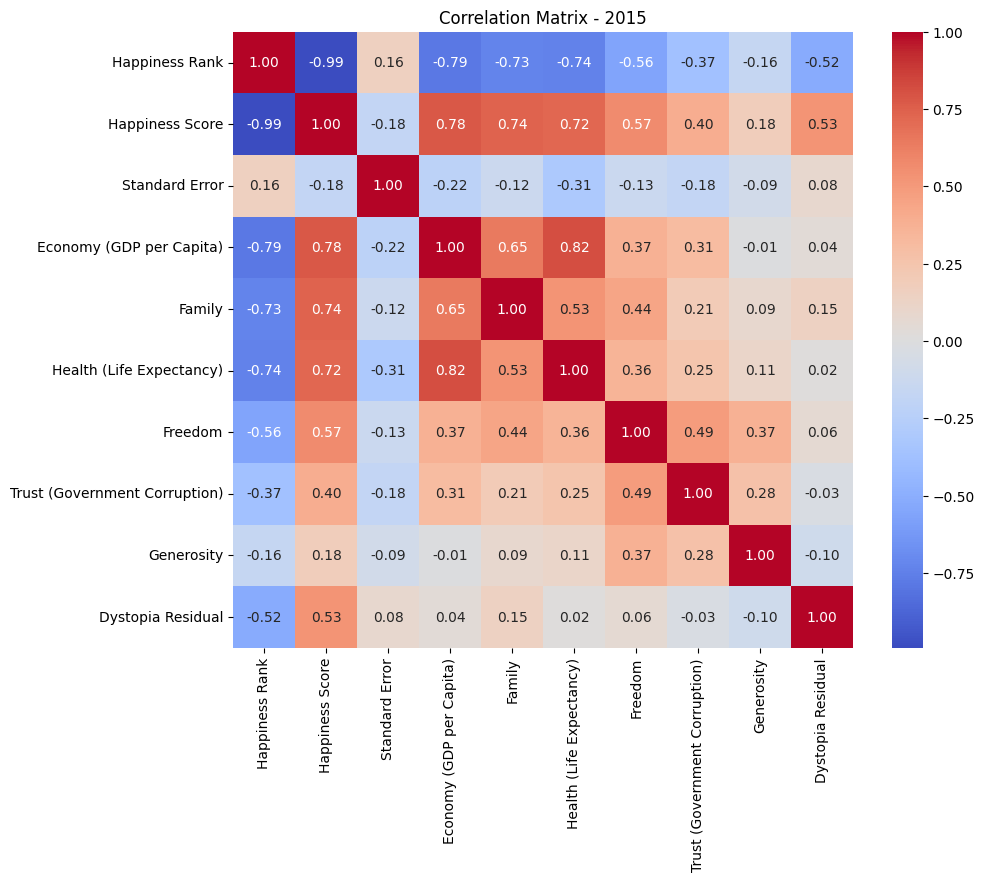

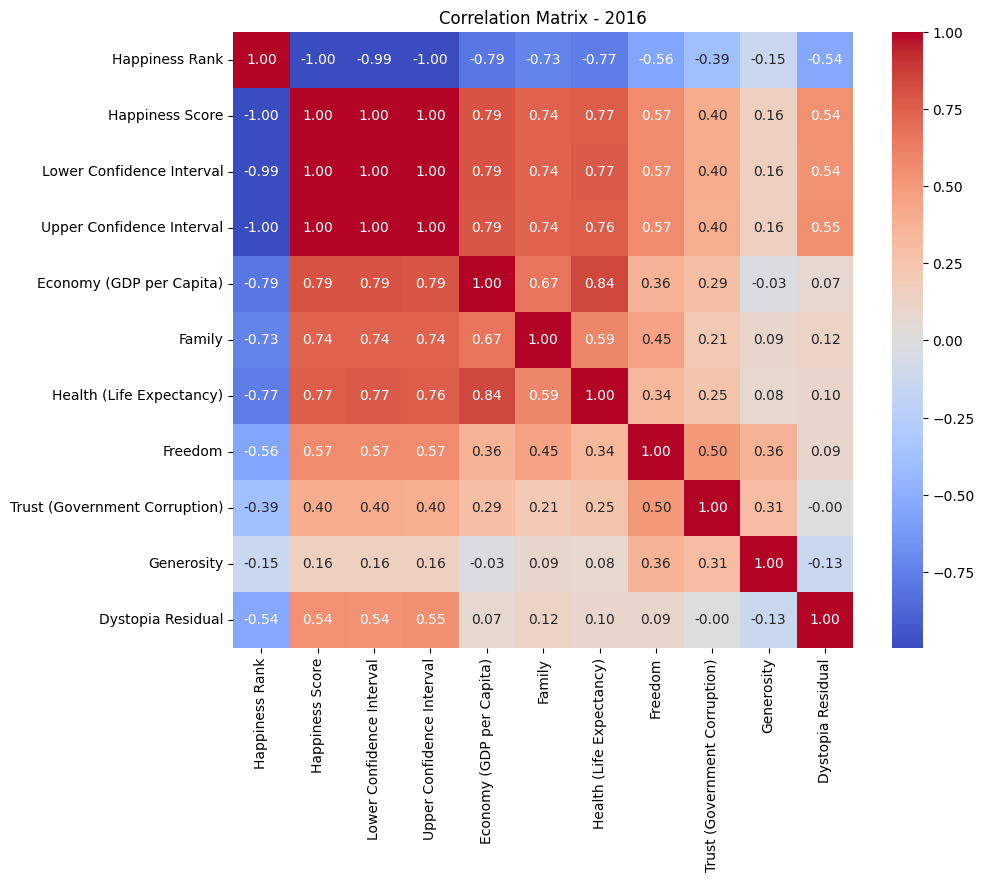

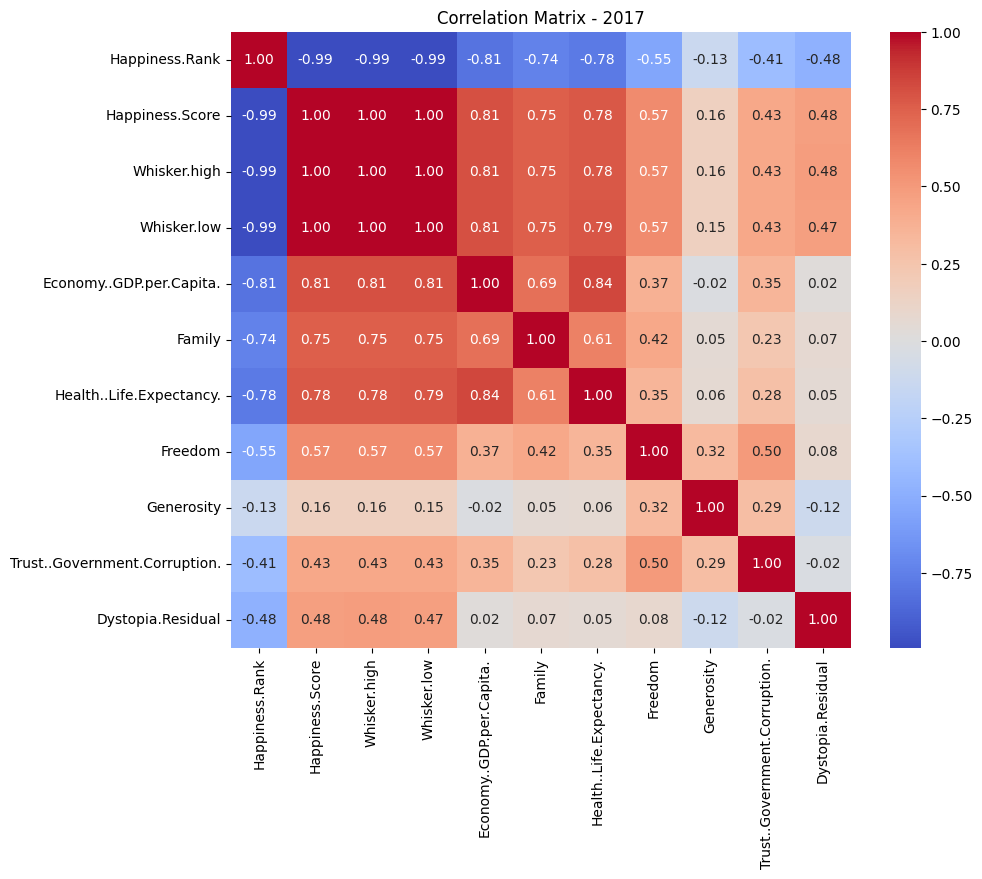

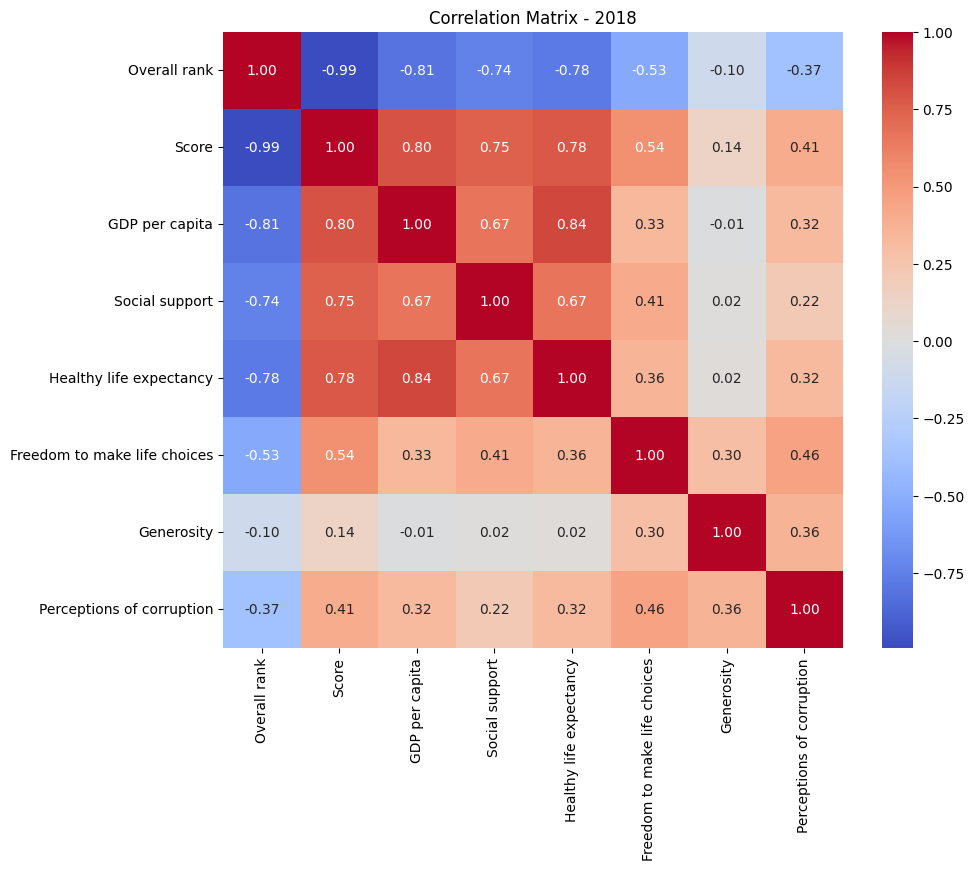

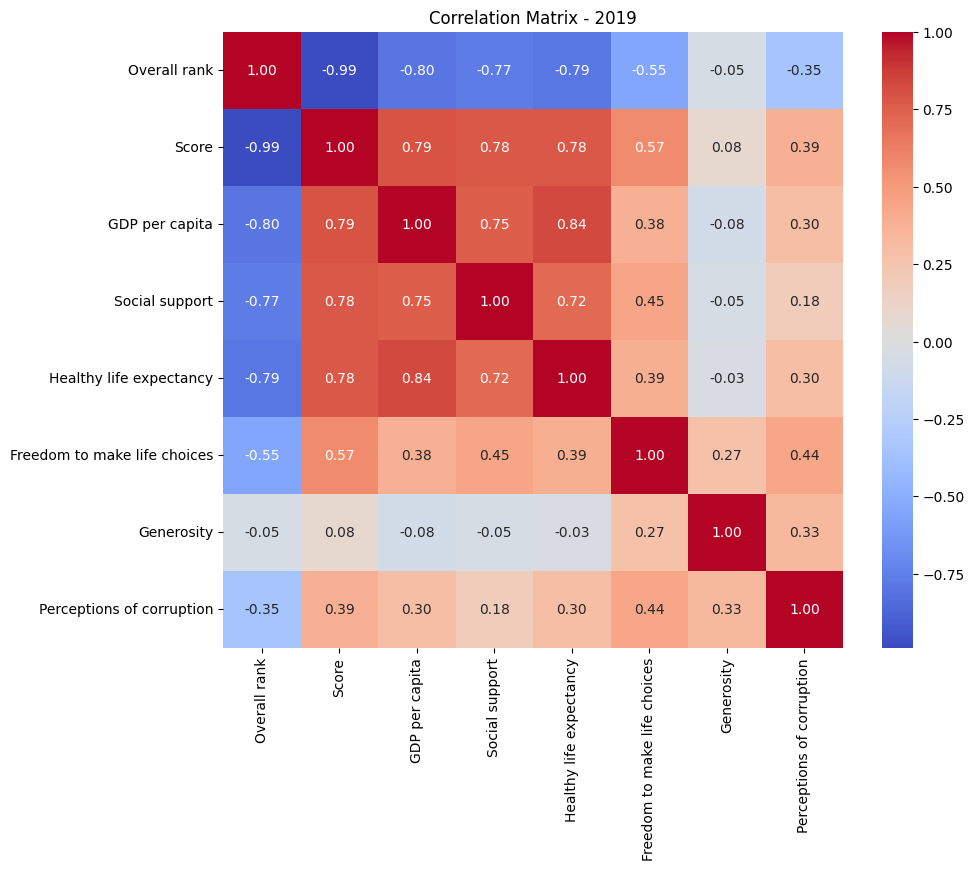

In [8]:
# @title World Happiness Report Data Analysis

# This Colab notebook performs data analysis on the World Happiness Report dataset for the years 2015 to 2019.

# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# @markdown **Load Data:**
# Assuming the CSV files are in the same directory as your Colab notebook or in a subdirectory, adjust the path accordingly
csv_files_path = '/content/'

# Load all the CSV files into a dictionary of DataFrames
data = {year: pd.read_csv(os.path.join(csv_files_path, f"{year}.csv")) for year in range(2015, 2020)}

# @markdown **Display Basic Information:**
# Display basic information about each DataFrame, including column names
for year, df in data.items():
    print(f"\nData for the year {year}:")
    print(df.info())
    print("Column names:", df.columns)

# @markdown **Visualize Trend:**
# Visualize the trend of average happiness score over the years
try:
    average_scores = {year: df['Happiness Score'].mean() for year, df in data.items()}
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=list(average_scores.keys()), y=list(average_scores.values()))
    plt.title('Average Happiness Score Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Happiness Score')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}. Check if 'Happiness Score' column exists in all DataFrames.")

# @markdown **Identify Top and Bottom Countries:**
# Identify the top and bottom countries for each year
for year, df in data.items():
    try:
        top_countries = df.nlargest(5, 'Happiness Score')[['Country', 'Happiness Score']]
        bottom_countries = df.nsmallest(5, 'Happiness Score')[['Country', 'Happiness Score']]

        print(f"\nTop 5 countries in {year}:")
        print(top_countries)

        print(f"\nBottom 5 countries in {year}:")
        print(bottom_countries)
    except KeyError as e:
        print(f"KeyError: {e}. Check if 'Happiness Score' column exists in DataFrame for {year}.")

# @markdown **Correlation Matrix:**
# Correlation matrix for each year
for year, df in data.items():
    try:
        correlation_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix - {year}')
        plt.show()
    except Exception as e:
        print(f"Error plotting correlation matrix for {year}: {e}")


**Regional Analysis:**
Explore Happiness Scores by Region:
Group countries by their regions and calculate the average happiness score for each region. Visualize the regional distribution of happiness scores over the years.

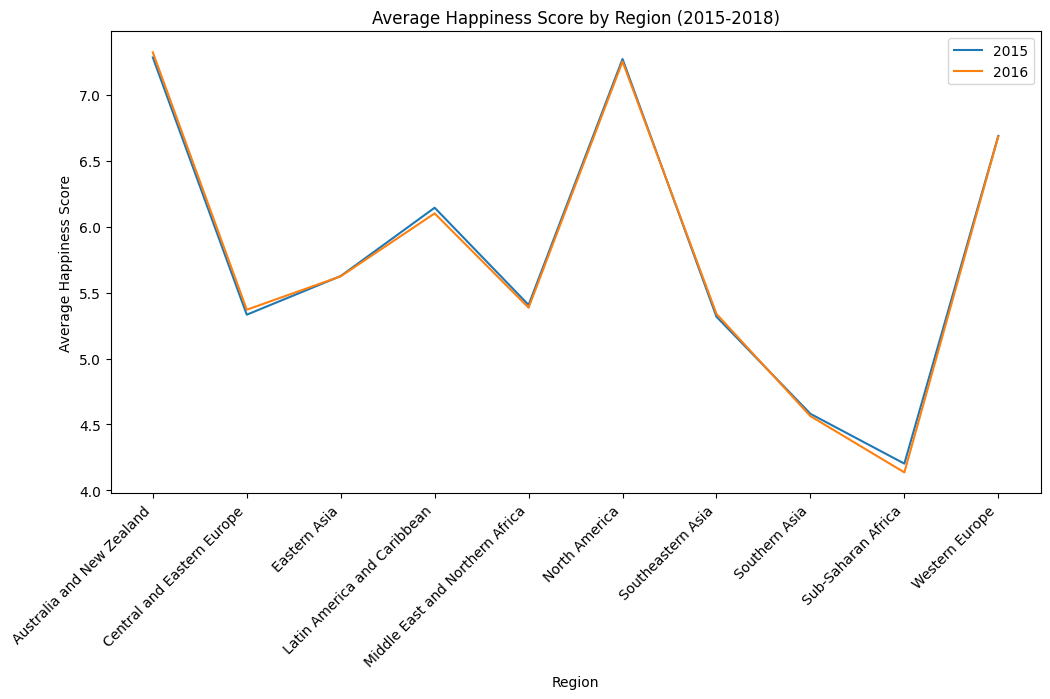

In [11]:
# Group by region and calculate average happiness score
average_region_scores = {}

for year in range(2015, 2019):
    if 'Region' in data[year].columns:
        average_region_scores[year] = data[year].groupby('Region')['Happiness Score'].mean()

# Plot regional happiness scores over the years
plt.figure(figsize=(12, 6))
for year, region_scores in average_region_scores.items():
    plt.plot(region_scores, label=str(year))

plt.title('Average Happiness Score by Region (2015-2018)')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()


**Factor Analysis:**
Identify Key Factors Influencing Happiness:
Explore factors like GDP per capita, social support, life expectancy, etc., and their impact on happiness scores. Use correlation analysis or create scatter plots to visualize relationships.

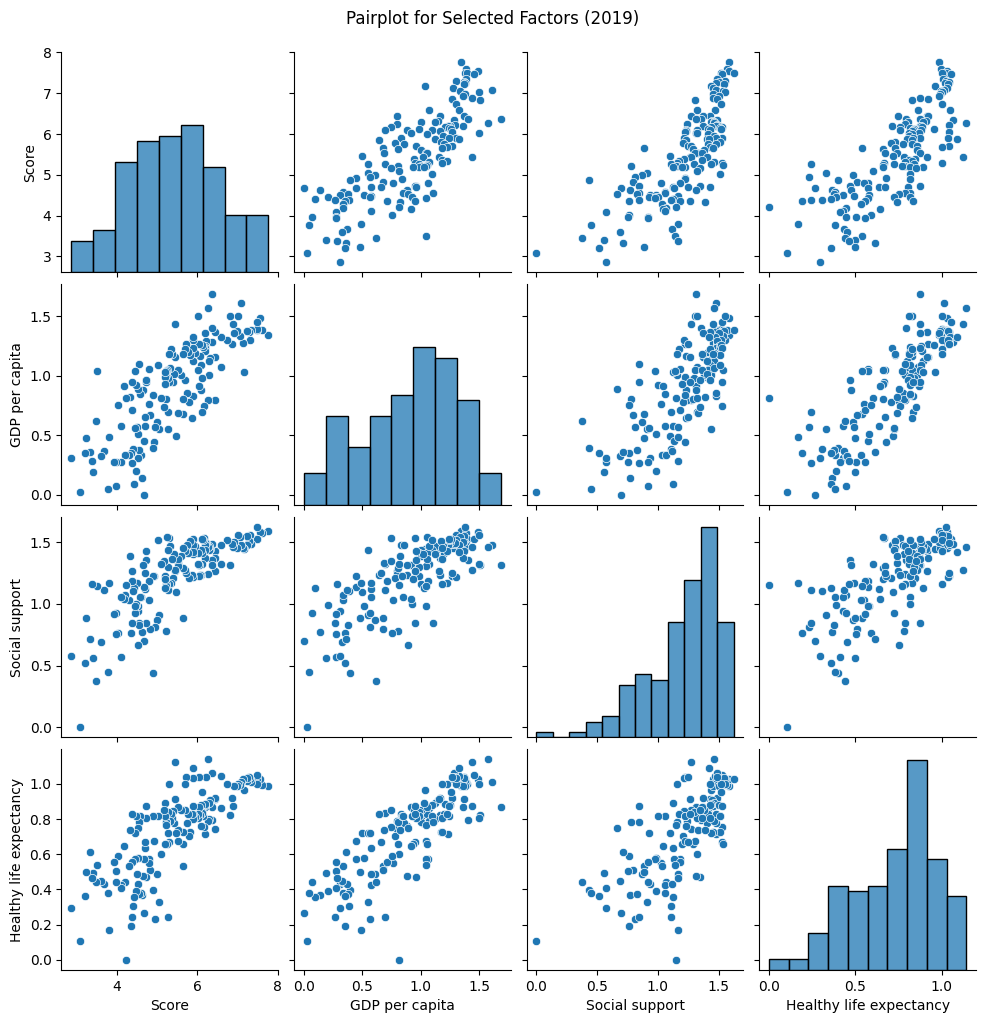

In [14]:
# Actual column names for 2019 DataFrame
actual_columns_2019 = data[2019].columns

# Selecting relevant columns for factor analysis
factors = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']

# Check if the specified factors exist in the actual columns
missing_factors = set(factors) - set(actual_columns_2019)
if missing_factors:
    print(f"Missing factors in 2019 DataFrame: {missing_factors}")
else:
    # Pairplot for selected factors
    sns.pairplot(data[2019][factors])
    plt.suptitle('Pairplot for Selected Factors (2019)', y=1.02)
    plt.show()


**Time Series Analysis:**

**Analyze Time Trends for Specific Countries:**

Select a few countries and analyze how their happiness scores have changed over the years. Create line plots or bar charts to illustrate these trends.

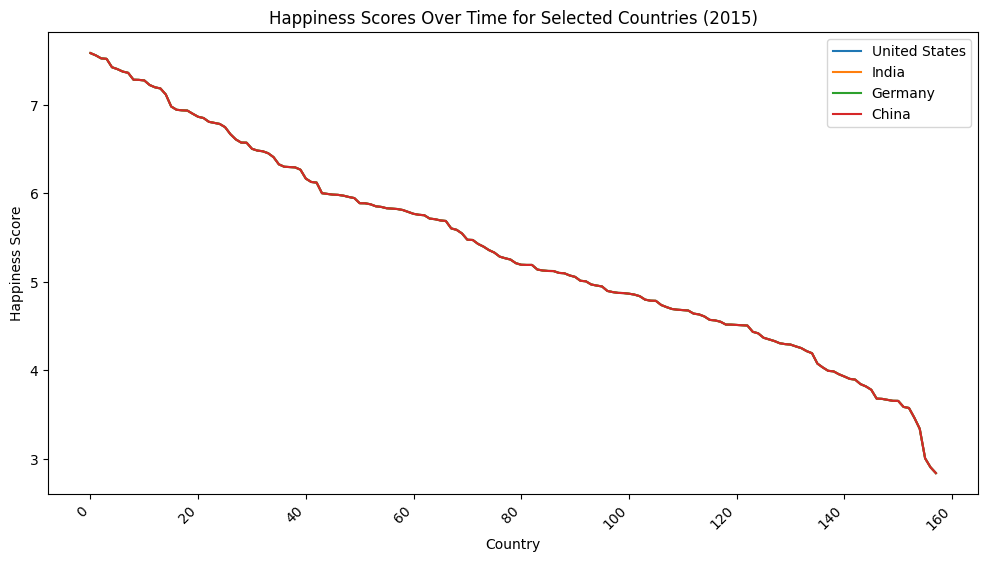

In [15]:
# Select specific countries for time series analysis
selected_countries = ['United States', 'India', 'Germany', 'China']

# Plot happiness scores over the years for selected countries
plt.figure(figsize=(12, 6))
for country in selected_countries:
    plt.plot(data[2015]['Happiness Score'], label=country)

plt.title('Happiness Scores Over Time for Selected Countries (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()
